# Libraries and Data

In [60]:
import face_recognition
from keras_facenet import FaceNet
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data=pd.read_csv('E:/Face_2_BMI/Data/Test/data.csv')

In [146]:
data.head(10)
print(len(data))

846


In [65]:
data_male=data[:405]
data_female=data[405:]

In [66]:
data_male.head(10)
#print(data_male)

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [67]:
data_female.head(10)
#print(data_female)

,image,height,weight,BMI
405,f_001,1.54,55,23.191095
406,f_002,1.55,55,22.892820
407,f_003,1.56,55,22.600263
408,f_004,1.55,55,22.892820
409,f_005,1.54,56,23.612751
410,f_006,1.55,56,23.309053
411,f_007,1.56,56,23.011177
412,f_008,1.54,54,22.769438
413,f_009,1.55,54,22.476587
414,f_010,1.56,54,22.189349


# EDA

Female Data Distribution

Text(0.5, 0, 'Height(m)')

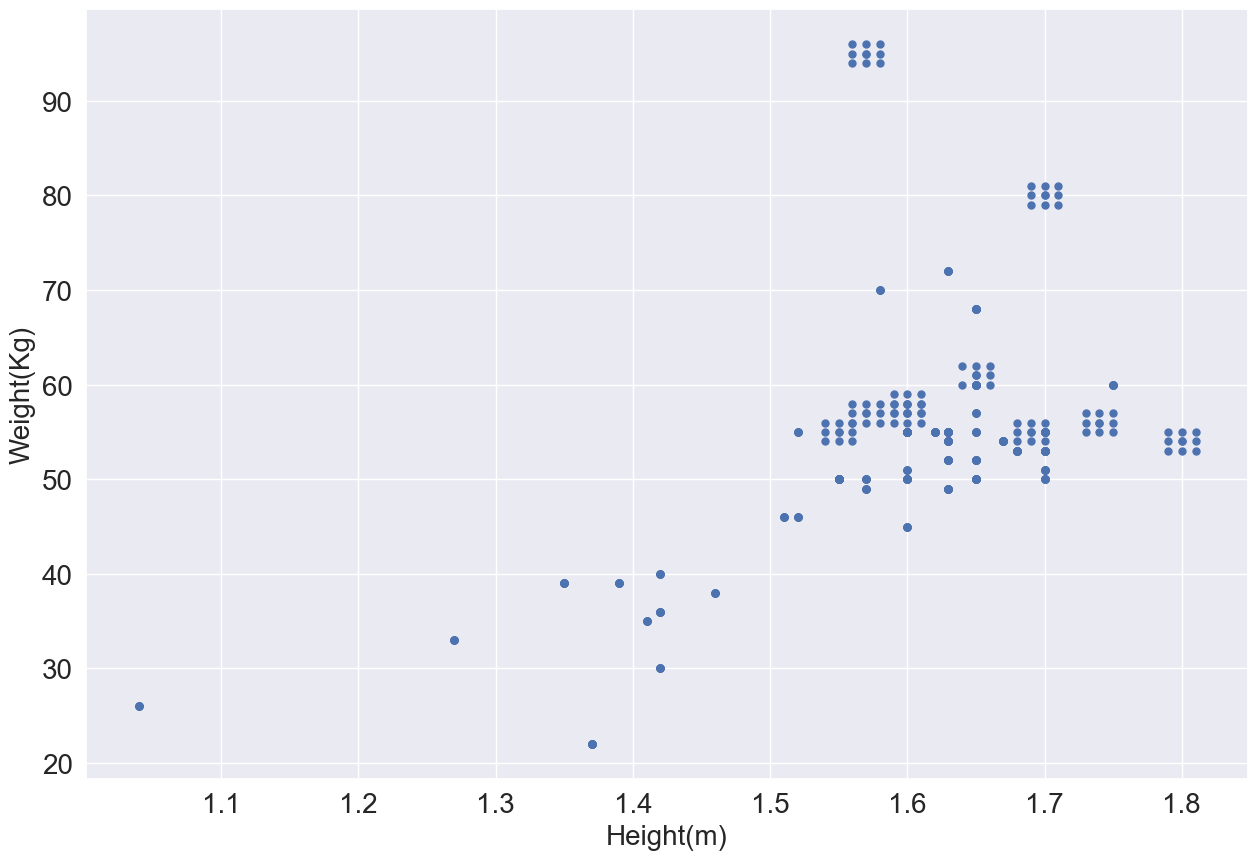

In [9]:
sns.set()
female_plot=data_female.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False,fontsize=20)
female_plot.set_ylabel('Weight(Kg)',fontsize=20)
female_plot.set_xlabel('Height(m)',fontsize=20)

In [10]:
print('Average Height = ' + str(round(data_female['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_female['weight'].mean(), 2)) + 'kg')

Average Height = 1.6m, Average Weight = 53.21kg


Text(0.5, 0, 'Height(m)')

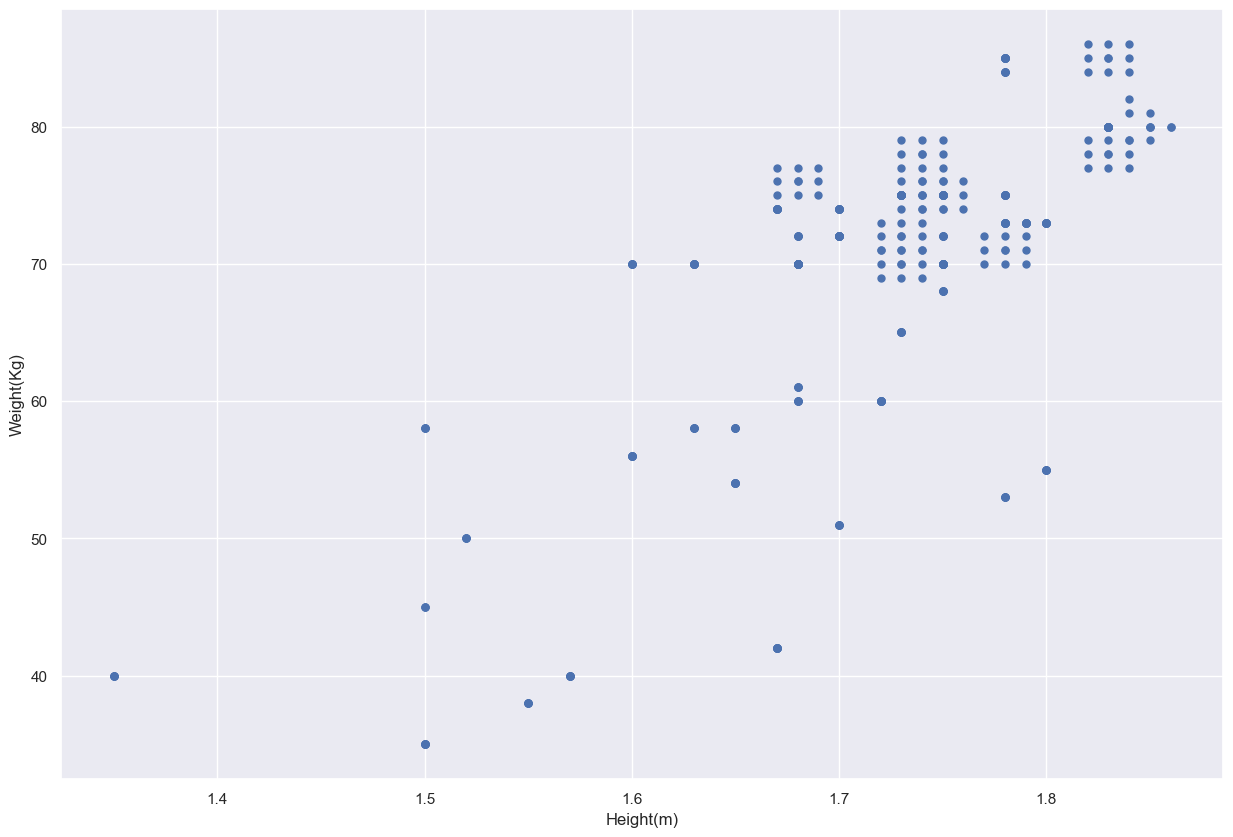

In [11]:
sns.set()
male_plot=data_male.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False)
male_plot.set_ylabel('Weight(Kg)')
male_plot.set_xlabel('Height(m)')

In [12]:
print('Average Height = ' + str(round(data_male['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_male['weight'].mean(), 2)) + 'kg')

Average Height = 1.71m, Average Weight = 68.34kg


In [13]:
def bmi_classification(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif (bmi >= 18.5) and (bmi < 25):
        return 'Normal'
    elif (bmi >= 25) and (bmi < 30):
        return 'Overweight'
    elif (bmi >= 30) and (bmi < 35):
        return 'Moderately obese'
    elif (bmi >= 35) and (bmi < 40):
        return 'Severely obese'
    else:
        return 'Very severely obese'

In [14]:
data['class'] = data['BMI'].apply(bmi_classification)
data['class'].value_counts()

Normal            562
Underweight       143
Overweight        128
Severely obese     10
Name: class, dtype: int64

# Feature Extraction

In [46]:
from keras_facenet import FaceNet
import cv2

# Load an image
image = cv2.imread("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/f_022.jpg")

# Create a FaceNet object
embedder = FaceNet()

# Extract the face embeddings
detections = embedder.extract(image, threshold=0.95)

# Print the embeddings
for i, detection in enumerate(detections):
    print(f'Embedding {i}: {detection["embedding"]}')
    #print(len(detection["embedding"]))


1/1 [==============================] - 2s 2s/step
Embedding 0: [-0.01238016  0.04195865 -0.03892315 -0.02416944  0.00598683 -0.00931887
  0.05583096  0.00661304 -0.04188681 -0.00414699  0.0270933  -0.06026321
  0.02355335 -0.05267568  0.02777824 -0.02830275  0.00878681  0.07143531
  0.04291633 -0.01500196  0.0079311  -0.03129581 -0.02695928  0.00640218
  0.02231543 -0.08038918 -0.04967715 -0.01139402  0.01819123 -0.03324544
 -0.01932928 -0.0572249  -0.02696761 -0.03700328  0.03565097  0.04243122
  0.02871593 -0.03080709  0.08262108  0.02716535 -0.03270808  0.06892665
  0.08696834 -0.0318022   0.04141892  0.12449038 -0.08629052 -0.01682361
 -0.00321074 -0.02556845  0.03175042  0.00755261 -0.05586913  0.05934015
 -0.00020353 -0.06401641  0.09373603 -0.02618217 -0.0197058  -0.02026069
 -0.01400886  0.05242854 -0.02407989 -0.0618791  -0.06361212 -0.03029323
  0.00229295 -0.04421794 -0.01591407  0.03928291 -0.01374113 -0.06358904
 -0.01774442 -0.06349079  0.05939281 -0.0614443   0.00554926 

In [53]:
from keras_facenet import FaceNet
import cv2

def encode_image(image_path):
    embedder = FaceNet()
    try:
        image=cv2.imread(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=embedder.embeddings([image])
    return face_encoding[0].tolist()

import os
face_data=[]
for image_name in data.image:
    if os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpg"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpeg"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".png"):
        face_encoding=encode_image("E:/Face_2_BMI/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)

print(face_data)
print(len(face_data))

1/1 [==============================] - 3s 3s/step
[0.04271777346730232, -0.007555531803518534, -0.1061275452375412, 0.08445832878351212, -0.03740688040852547, 0.0321957990527153, -0.053134337067604065, 0.0935126468539238, -0.023172276094555855, 0.02441924437880516, 0.013042181730270386, 0.028253359720110893, -0.04713112860918045, -0.05226544290781021, -0.001329304650425911, -0.08019222319126129, 0.04293004795908928, 0.055496782064437866, 0.005755752325057983, -0.07157623767852783, -0.08197328448295593, 0.09323057532310486, 0.06194792687892914, -0.053359974175691605, -0.0643063560128212, 0.040478140115737915, 0.03628460317850113, 0.006489270832389593, 0.011228096671402454, -0.0012930001830682158, -0.04699065536260605, 0.05774696171283722, 0.03331809863448143, -0.021909013390541077, -0.03812677040696144, 0.02631009742617607, -0.02091139182448387, 0.0247149970382452, -0.018976489081978798, -0.0126036973670125, -0.020603222772479057, 0.01710030622780323, 0.013961676508188248, -0.0510659292

In [69]:
def encode_image(image_path):
    try:
        image=face_recognition.load_image_file(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=face_recognition.face_encodings(image)
    if not face_encoding:
        print("No Face Found at " + image_path)
        return np.zeros(128).tolist()
    return face_encoding[0].tolist()

face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/f_022.jpg")
#face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/Test/no_face.png")

print(face_encoding)

[-0.1909390389919281, 0.07279763370752335, 0.02886577881872654, -0.09059697389602661, -0.1071649119257927, -0.03733478859066963, -0.0024412181228399277, -0.08618122339248657, 0.26867711544036865, -0.17787954211235046, 0.16378527879714966, -0.08120566606521606, -0.2600371539592743, 0.05679319053888321, -0.09344872832298279, 0.1439731866121292, -0.2666242718696594, -0.12898655235767365, -0.005990025587379932, -0.08238662779331207, 0.1636556088924408, -0.030105851590633392, -0.017434312030673027, 0.17537452280521393, -0.19501477479934692, -0.2992565631866455, -0.1332128345966339, -0.15321968495845795, -0.027065100148320198, -0.05518220737576485, 0.028351429849863052, 0.01450544223189354, -0.19083327054977417, -0.014055460691452026, -0.04629885032773018, 0.1398436278104782, 0.00991016998887062, -0.09233434498310089, 0.1124408021569252, -0.040937118232250214, -0.2053675800561905, -0.08374737203121185, 0.09840519726276398, 0.20432566106319427, 0.13757428526878357, 0.034723926335573196, 0.017

converting all images to face encoding

In [148]:
import os
face_data=[]
#print(data.image)
for image_name in data.image:
    if os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)

In [149]:
X=np.array(face_data)
y_height=data.height.values
y_weight=data.weight.values
y_BMI=data.BMI.values
#plotX=pd.DataFrame(X)

# Model Creation

Spliting Data

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test, y_BMI_train, y_BMI_test = train_test_split(X, y_height, y_weight, y_BMI, random_state=1)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def report_goodness(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    #print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [151]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib

## Simple Linear Regression

In [21]:
#Height Estimation
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Variance score: 0.64
Model Performance
Average Error: 0.0352 degrees.
Accuracy = 82.21%.


In [22]:
#Weight Estimation
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_height,X_test,y_weight_test)

Variance score: -171.82
Model Performance
Average Error: 3.5628 degrees.
Accuracy = 12.30%.


In [23]:
#BMI Estimation
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_height,X_test,y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/linear_bmi_predictor1.model'
joblib.dump(model_BMI, bmi_model)

Variance score: -241.55
Model Performance
Average Error: 2.5762 degrees.
Accuracy = 16.29%.


['E:/Face_2_BMI_Estimation_Project/models/linear_bmi_predictor1.model']

## Ridge Linear Regression

In [24]:
#Estimating Height

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_height = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Variance score: 0.61
Model Performance
Average Error: 0.0373 degrees.
Accuracy = 81.35%.


In [25]:
#Estimating Weight
model_weight = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Variance score: 0.73
Model Performance
Average Error: 0.1064 degrees.
Accuracy = 97.27%.


In [26]:
#Estimating BMI
model_BMI = make_pipeline(StandardScaler(with_mean=True), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor1.model'
joblib.dump(model_BMI, bmi_model)

Variance score: 0.54
Model Performance
Average Error: 0.0878 degrees.
Accuracy = 97.11%.


['E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor1.model']

## Random Forest Regressor

In [152]:
model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Variance score: 0.43
Model Performance
Average Error: 0.0389 degrees.
Accuracy = 91.53%.


In [154]:
#With Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [155]:
rf_height_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))
report_goodness(rf_height_model, X_test, y_height_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Variance score: 0.74
Model Performance
Average Error: 0.0252 degrees.
Accuracy = 94.48%.


In [156]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Variance score: 0.52
Model Performance
Average Error: 0.1106 degrees.
Accuracy = 97.17%.


In [157]:
rf_weight_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))
report_goodness(rf_weight_model,X_test,y_weight_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Variance score: 0.79
Model Performance
Average Error: 0.0693 degrees.
Accuracy = 98.22%.


In [158]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Variance score: 0.38
Model Performance
Average Error: 0.0899 degrees.
Accuracy = 97.01%.


In [159]:
rf_BMI_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))
report_goodness(rf_BMI_model, X_test, y_BMI_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Variance score: 0.72
Model Performance
Average Error: 0.0588 degrees.
Accuracy = 98.03%.


## SVR

In [34]:
from sklearn.svm import SVR

model_height=SVR(kernel='rbf')
model_height=model_height.fit(X_train, np.log(y_height_train) )
report_goodness(model_height, X_test, y_height_test)

Variance score: 0.50
Model Performance
Average Error: 0.0502 degrees.
Accuracy = 80.36%.


In [35]:
model_weight=SVR(kernel='rbf')
model_weight=model_weight.fit(X_train, np.log(y_weight_train) )
report_goodness(model_weight, X_test, y_weight_test)

Variance score: 0.78
Model Performance
Average Error: 0.0872 degrees.
Accuracy = 97.73%.


In [36]:
model_BMI=SVR(kernel='rbf')
model_BMI=model_BMI.fit(X_train, np.log(y_BMI_train) )
report_goodness(model_BMI, X_test, y_BMI_test)

Variance score: 0.65
Model Performance
Average Error: 0.0774 degrees.
Accuracy = 97.46%.


In [160]:
import joblib
height_model = 'E:/Face_2_BMI/models/rf_height_predictor1.model'
weight_model = 'E:/Face_2_BMI/models/rf_weight_predictor1.model'
bmi_model = 'E:/Face_2_BMI/models/rf_bmi_predictor1.model'
joblib.dump(rf_height_model, height_model)
joblib.dump(rf_weight_model, weight_model)
joblib.dump(rf_BMI_model, bmi_model)

['E:/Face_2_BMI/models/rf_bmi_predictor1.model']

In [161]:
#load model from disk
import joblib
height_model = 'E:/Face_2_BMI/models/rf_height_predictor1.model'
weight_model = 'E:/Face_2_BMI/models/rf_weight_predictor1.model'
bmi_model = 'E:/Face_2_BMI/models/rf_bmi_predictor1.model'
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

In [162]:
def predict_height_width_BMI(test_image,height_model,weight_model,bmi_model):
    test_array = np.expand_dims(np.array(encode_image(test_image)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = np.ndarray.item(np.exp(bmi_model.predict(test_array)))
    return {'height':height,'weight':weight,'bmi':bmi}
    

In [141]:
from PIL import Image

# Load image
image = Image.open('E:/Face_2_BMI/Data/Test/leela.jpeg')

# Resize image
resized_image = image.resize((200,200))

# Display resized image
resized_image.save('E:/Face_2_BMI/Data/Test/leela.jpeg')

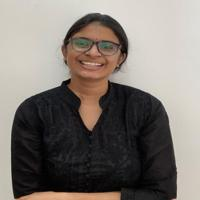

In [163]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/jyothirmai_2.jpeg' 
Image(test_image)

In [164]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6663541083123128, 'weight': 65.57553831642177, 'bmi': 24.110407148193893}


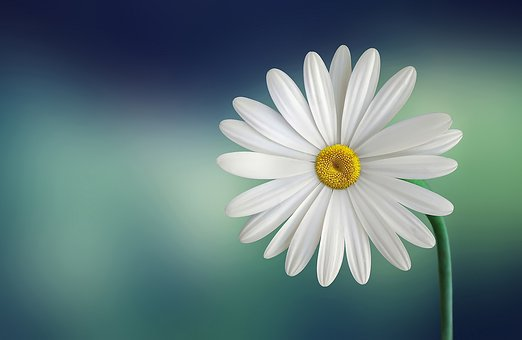

In [165]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/flower.jpg' 
Image(test_image)

In [166]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

No Face Found at E:/Face_2_BMI/Data/Test/flower.jpg
Face Not Found


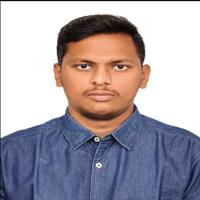

In [167]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/mano_teja.jpeg' 
Image(test_image)

In [168]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6608985880267766, 'weight': 70.0029865514059, 'bmi': 26.551002268267904}


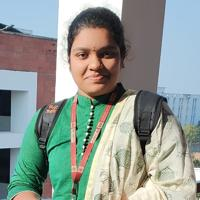

In [169]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/charitha.jpeg' 
Image(test_image)

In [170]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.5822702695635515, 'weight': 74.04039422970497, 'bmi': 30.016637610079755}


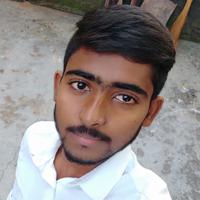

In [171]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/vamsi.jpeg' 
Image(test_image)

In [172]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.7102390318969871, 'weight': 68.4455508059516, 'bmi': 23.659234920734953}


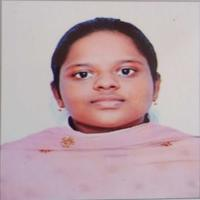

In [129]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/bhavya.jpeg' 
Image(test_image)

In [130]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.594495116422642, 'weight': 54.15399302332071, 'bmi': 21.187417572116235}


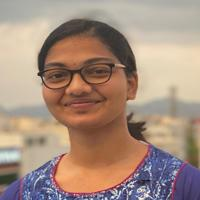

In [94]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/mythri2.jpeg' 
Image(test_image)

In [95]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.6352148116067493, 'weight': 59.31549064863713, 'bmi': 22.122049661735954}


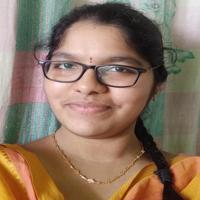

In [142]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI/Data/Test/leela.jpeg' 
Image(test_image)

In [143]:
if(encode_image(test_image)==np.zeros(128).tolist()):
    print("Face Not Found")
else:
    print(predict_height_width_BMI(test_image,height_model,weight_model,bmi_model))

{'height': 1.609916275660908, 'weight': 53.97658211944636, 'bmi': 21.25007135364765}
